In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

#for 'data (data,data)' type file
def spitdata(filename,xmin=0,xmax=math.inf,option="yes"):
    with open(filename) as f:
        rawdata = f.readlines()
    x = []
    y = []
    z = []
    for i in range (0, len(rawdata)):
        xtemp = float(rawdata[i].split('\t')[0])
        ytemp = float(rawdata[i].split('\t')[1].split(',')[0][1:-2])
        ztemp = float(rawdata[i].split('\t')[1].split(',')[1][:-3])
        if(xtemp>xmin and xtemp<xmax):
            x.append(xtemp)
            y.append(ytemp)
            z.append(ztemp)
    if(option != "no"):
        for i in range (0, len(z)):
            if(z[i] > 0):
                z[i] = -360+z[i]
    return x,y,z

#for 'data data' type file
def spitdata2(filename,xmin=0,xmax=math.inf):
    with open(filename) as f:
        rawdata = f.readlines()
    data = []
    x = []
    y = []
    for i in range (0, len(rawdata)):
        xtemp = float(rawdata[i].split('\t')[0])
        ytemp = float(rawdata[i].split('\t')[1])
        if(xtemp > xmin and xtemp < xmax):
            x.append(xtemp)
            y.append(ytemp)
    return x,y

## HPF

slope: 2.9558 (x < 200k)


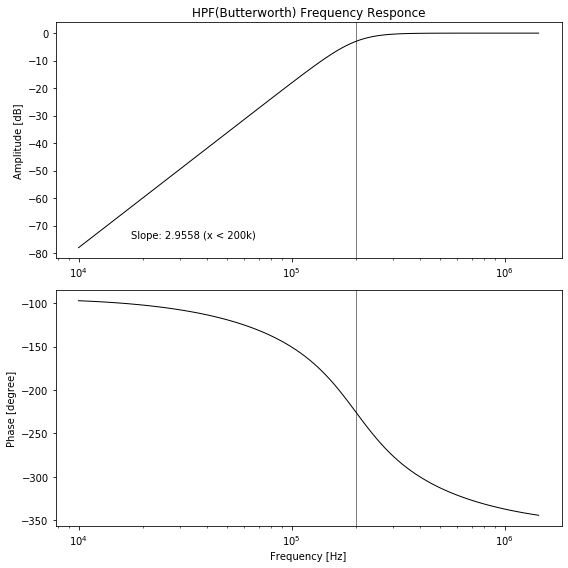

In [2]:
hpf_b_x,hpf_b_y,hpf_b_z = spitdata("HPF_B_f.txt",1000,1500000)
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8,8), tight_layout = True)

#trendline
new_x = []
new_y = []
for i in range (0, len(hpf_b_x)):
    if(hpf_b_x[i]<200000):
        new_x.append(hpf_b_x[i])
        new_y.append(hpf_b_y[i])  
hpf_b_x_np = np.array(new_x)
hpf_b_y_np = np.array(new_y)
slope, intercept = np.polyfit(np.log10(hpf_b_x_np), hpf_b_y_np, 1)
print("slope: "+str(round(slope/20,4))+ " (x < 200k)")

ax1.title.set_text("HPF(Butterworth) Frequency Responce")
ax1.set_xscale('log')
ax1.plot(hpf_b_x,hpf_b_y,c='black',linewidth=1)
ax1.set_ylabel("Amplitude [dB]")
ax1.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)
ax1.text(0.15, 0.1, "Slope: "+str(round(slope/20,4))+ " (x < 200k)", verticalalignment='center', transform=ax1.transAxes)

ax2.set_xscale("log")
ax2.plot(hpf_b_x,hpf_b_z,c='black',linewidth=1)
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Phase [degree]")
ax2.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)

#plt.show()
plt.savefig("figures/HPF_B_f.png")

slope: 3.2232 (x < 200k)


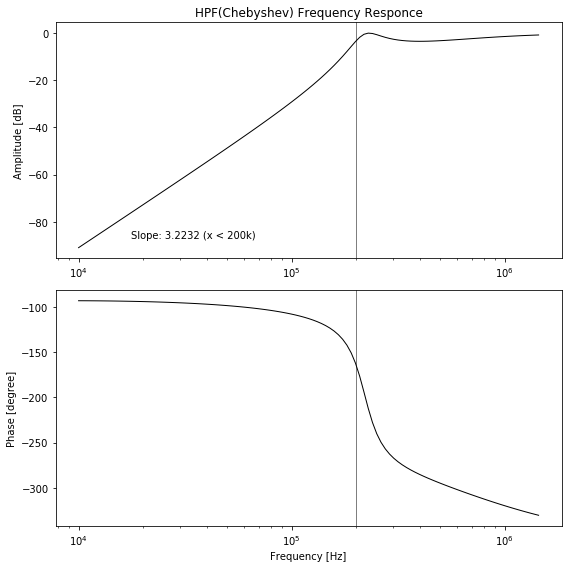

In [3]:
hpf_c_x,hpf_c_y,hpf_c_z = spitdata("HPF_C_f.txt",1000,1500000)
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8,8), tight_layout = True)

#trendline
new_x = []
new_y = []
for i in range (0, len(hpf_c_x)):
    if(hpf_c_x[i]<200000):
        new_x.append(hpf_c_x[i])
        new_y.append(hpf_c_y[i])  
hpf_c_x_np = np.array(new_x)
hpf_c_y_np = np.array(new_y)
slope, intercept = np.polyfit(np.log10(hpf_c_x_np), hpf_c_y_np, 1)
print("slope: "+str(round(slope/20,4))+ " (x < 200k)")

ax1.title.set_text("HPF(Chebyshev) Frequency Responce")
ax1.set_xscale('log')
ax1.plot(hpf_c_x,hpf_c_y,c='black',linewidth=1)
ax1.set_ylabel("Amplitude [dB]")
ax1.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)
ax1.text(0.15, 0.1, "Slope: "+str(round(slope/20,4))+ " (x < 200k)", verticalalignment='center', transform=ax1.transAxes)

ax2.set_xscale("log")
ax2.plot(hpf_c_x,hpf_c_z,c='black',linewidth=1)
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Phase [degree]")
ax2.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)

#plt.show()
plt.savefig("figures/HPF_C_f.png")

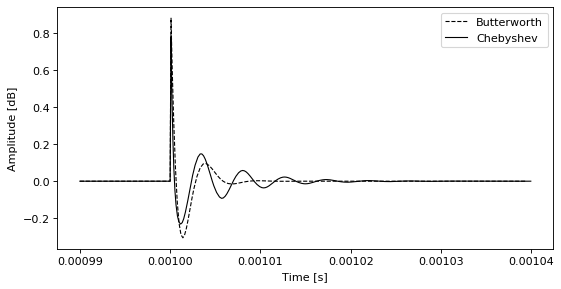

In [4]:
plt.figure(figsize=(8, 4), dpi=80)

butter_x,butter_y = spitdata2("HPF_B_s.txt",xmax = 1.04*10**(-3))
butter_x.insert(0,0.00099)
butter_y.insert(0,0)
#plt.title("HPF(Butterworth) Step Response")
plt.plot(butter_x,butter_y,c='black',linewidth=1,linestyle='dashed')
plt.ylabel("Amplitude [dB]")

cheby_x,cheby_y = spitdata2("HPF_C_s.txt",xmax = 1.04*10**(-3))
cheby_x.insert(0,0.00099)
cheby_y.insert(0,0)
#plt.title("HPF(Chebyshev) Step Response")
plt.plot(cheby_x,cheby_y,c='black',linewidth=1)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [dB]")
plt.legend(["Butterworth", "Chebyshev"], loc ="upper right")

#plt.show()
plt.savefig("figures/HPF_BC_s.png")

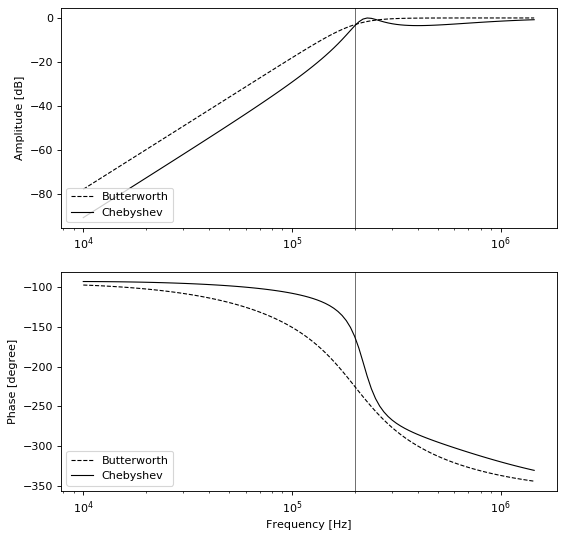

In [5]:
plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2, 1, 1)
#plt.title("LPF(Butterworth & Chebyshev) Frequency Responce")
plt.xscale('log')
plt.plot(hpf_b_x,hpf_b_y,c='black',linewidth=1,linestyle="dashed")
plt.plot(hpf_c_x,hpf_c_y,c='black',linewidth=1)
plt.ylabel("Amplitude [dB]")
plt.legend(["Butterworth", "Chebyshev"], loc ="lower left")
plt.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)

plt.subplot(2,1,2)
plt.xscale("log")
plt.plot(hpf_b_x,hpf_b_z,c='black',linewidth=1,linestyle="dashed")
plt.plot(hpf_c_x,hpf_c_z,c='black',linewidth=1)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [degree]")
plt.legend(["Butterworth", "Chebyshev"], loc ="lower left")
plt.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)

#plt.show()
plt.savefig("figures/HPF_BC_f.png")